# Phys 111 Final Project
## Lev Gruber, Charlie Schofield

A simplified model to study a bio-inspired triple spring mechanism. 

This jupyter notebook is arranged into the following sections:
1. **Test solution** ~ solving for both positions over time.
2. **Surfaces of section** / Poincare surfaces.
3. Position 1 vs. Position 2. curves

In [127]:
'''

Imports and LaTex formatting

'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, odeint

plt.rcParams['text.usetex'] = True

In [134]:
# Define global constants for the system
m_1 = 1
m_2 = 2
e_1 = 20
e_2 = 20
e_3 = 20
a = 0.1
l = 1

c_1 = (e_1 * a * l) / 3
c_2 = (e_2 * a * l) / 3
c_3 = (e_3 * a * l) / 3
 

def deriv(t, q):
    '''
    Inputs: 
    - q (array): 
    - t (float): time
    Outputs:
    - [dq1_dt, dq2_dt, dq1_dot_dt, dq2_dot_dt]
    '''
    # pull out variables from input array
    q_1, q_2, v_1, v_2 = q
    
    # define derivatives
    q_1_dot = v_1
    q_2_dot = v_2
    
    v_1_dot = (1)/(m_1 * l) * (c_1 * ( -(1+q_1) + 1/(1+q_1)**2) + c_2 * ( (1 + q_2 - q_1) - 1 / (1 + q_2 - q_1)**2 ))
    v_2_dot = (1)/(m_2 * l) * (c_3 * ( -(1+q_2) + 1/(1+q_2)**2) - c_2 * ( (1 + q_2 - q_1) + 1 / (1 + q_2 - q_1)**2 ))
    
    return [q_1_dot, q_2_dot, v_1_dot, v_2_dot]

### Section 1
This section contains a sample solution to the Euler-Lagrange equations of motion for this model. First define a function per mass to take our derivatives.

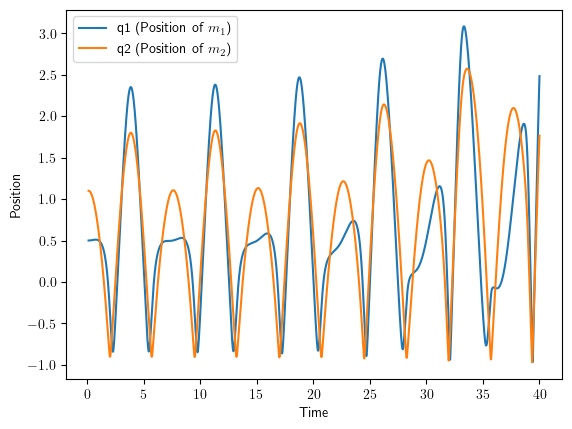

The solver successfully reached the end of the integration interval.


In [136]:
# Instantiate initial conditions
y0 = [0.5, 1.1, 0, 0]

# Instantiate time span
t_start = 0.1
t_end = 40
t = np.linspace(t_start, t_end, 10000)

# Solve the system using solve_ivp
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-6, atol=1e-8)

# Check if the integration was successful
plt.plot(result.t, result.y[0], label=r'q1 (Position of $m_1$)')
plt.plot(result.t, result.y[1], label=r'q2 (Position of $m_2$)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
# for troubleshooting
print(result.message)